In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.svm import SVC
import pylab
import time
import random
import matplotlib.pyplot as plt


# Monitor marginal density vs accuracy for support vector classifier

In [25]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
df = pd.read_csv('sea.csv', names = ['feature1','feature2','feature3','label'])

In [3]:
df1  = df[:15000]
df2  = df[15000:30000]
df3  = df[30000:45000]
df4  = df[45000:60000]

In [4]:

X = df1[['feature1', 'feature2', 'feature3']].values
y = df1['label'].values


## Data set has four concepts

Look for the changes in decision boundary

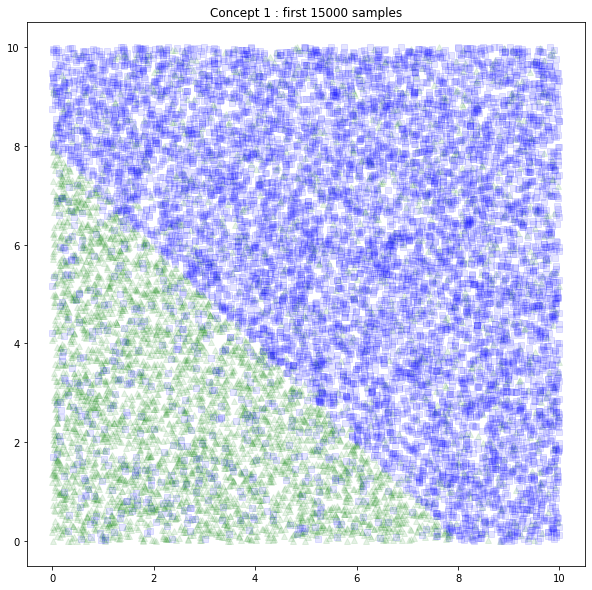

In [5]:


X3 = df1[['feature2','feature3']].values
y3 = df1['label'].values
plt.figure(figsize = (10,10))
plt.plot(X3[:, 0][y3 == 0], X3[:, 1][y3 == 0], 'g^', alpha = 0.1)

plt.plot(X3[:, 0][y3 == 1], X3[:, 1][y3 == 1], 'bs', alpha = 0.1)
plt.title ('Concept 1 : first 15000 samples')
plt.show()

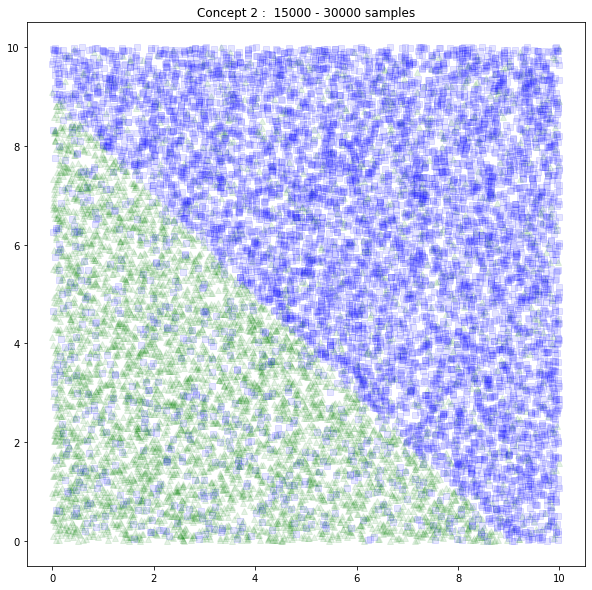

In [6]:

X3 = df2[['feature2','feature3']].values
y3 = df2['label'].values
plt.figure(figsize = (10,10))
plt.plot(X3[:, 0][y3 == 0], X3[:, 1][y3 == 0], 'g^', alpha = 0.1)

plt.plot(X3[:, 0][y3 == 1], X3[:, 1][y3 == 1], 'bs', alpha = 0.1)
plt.title ('Concept 2 :  15000 - 30000 samples')
plt.show()

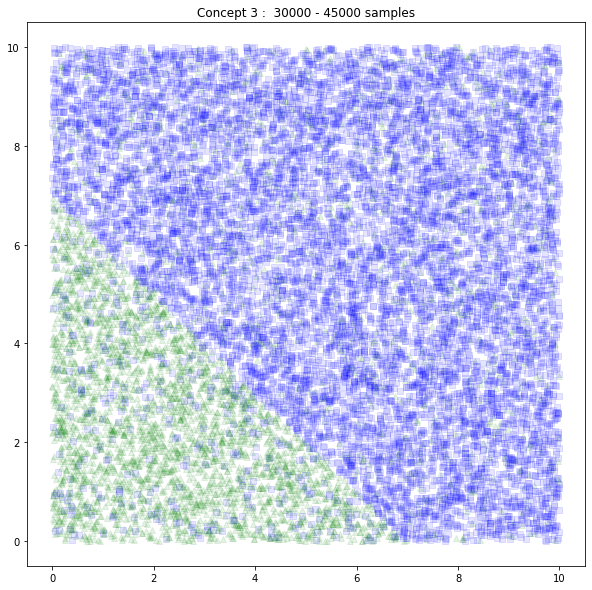

In [8]:
X3 = df3[['feature2','feature3']].values
y3 = df3['label'].values

plt.figure(figsize = (10,10))
plt.plot(X3[:, 0][y3 == 0], X3[:, 1][y3 == 0], 'g^', alpha = 0.1)

plt.plot(X3[:, 0][y3 == 1], X3[:, 1][y3 == 1], 'bs', alpha = 0.1)
plt.title ('Concept 3 :  30000 - 45000 samples')
plt.show()

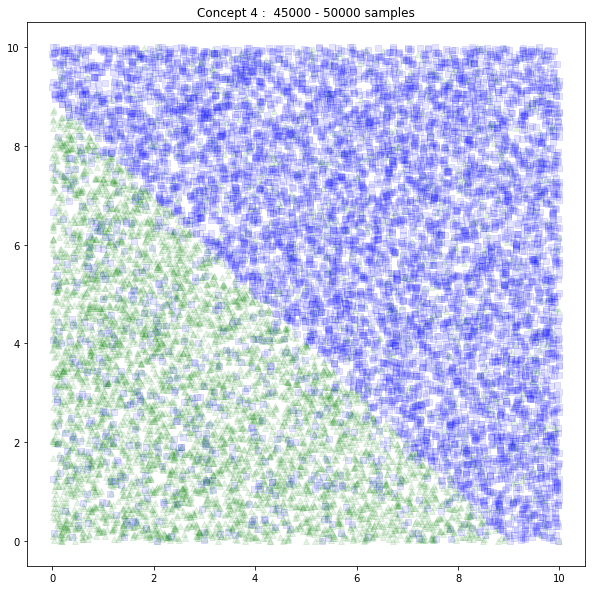

In [9]:
X3 = df4[['feature2','feature3']].values
y3 = df4['label'].values

plt.figure(figsize = (10,10))
plt.plot(X3[:, 0][y3 == 0], X3[:, 1][y3 == 0], 'g^', alpha = 0.1)

plt.plot(X3[:, 0][y3 == 1], X3[:, 1][y3 == 1], 'bs', alpha = 0.1)
plt.title ('Concept 4 :  45000 - 50000 samples')
plt.show()

In [10]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def calc_marginal_density(model,X):
    w = model.coef_
    w = w.reshape(X.shape[1],)
    b = model.intercept_
    dp = abs(np.dot(X,w)+b)
    rho  = np.round(np.array(dp<1).sum() / X.shape[0],7)
    return rho

## Monitor marginal density with changing data set

In [15]:

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [16]:
## Initiate model
df1 = df[0:15000]
X1 = df1[['feature1', 'feature2', 'feature3']].values
y1 = df1['label'].values
# split data into train and test sets
seed = 9
test_size = 0.33
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=test_size, random_state=seed)
# fit model no training data
model = SVC(kernel = 'linear' , C = 2, probability = True)
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)
accuracy = accuracy_score(y1_test, y1_pred)
print("Initial model accuracy: %.2f%%" % (accuracy * 100.0))

Initial model accuracy: 88.67%


In [17]:
print('initial marginal density ' , calc_marginal_density(model,X1))

initial marginal density  0.3726


In [18]:
rho_min = calc_marginal_density(model,X1)

<IPython.core.display.Javascript object>


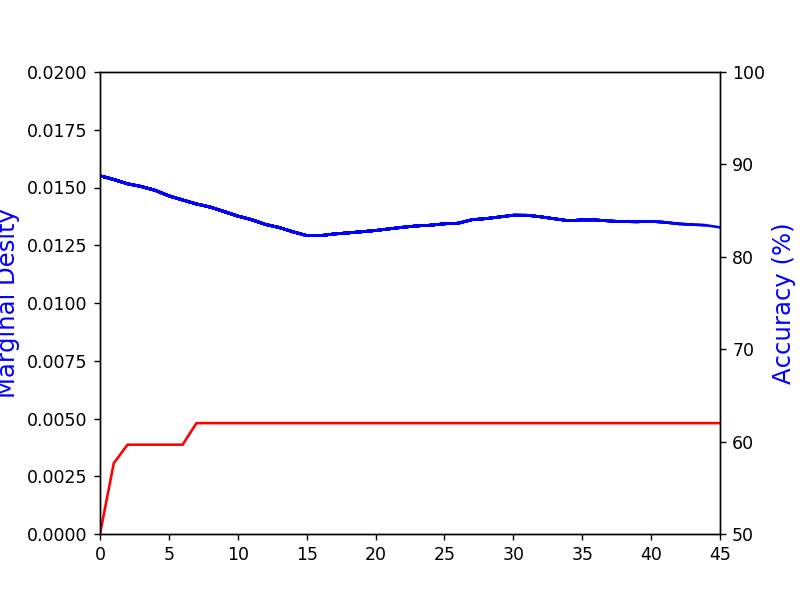

In [19]:
batch_size = 1000
window_size = 15000
# fig = plt.figure(figsize=(10,20))
fig = plt.figure()
ax  = fig.add_subplot(111)
ax2=ax.twinx()
plt.ion()

fig.show()
fig.canvas.draw()

densities = []
acc = []
rho_max = rho_min
for i in range(int((len(df)-window_size)/batch_size)+1):
    df_temp = df[(i*batch_size):((i*batch_size)+window_size)]
    X2 = df_temp[['feature1', 'feature2', 'feature3']].values
    y2 = df_temp['label'].values
    rho = calc_marginal_density(model,X2)
    if  (rho > rho_max):
        rho_max = rho
    
    densities.append(rho_max -rho_min)
#     densities.append(rho)
    y2_pred = model.predict(X2)
    acc.append((100*accuracy_score(y2, y2_pred)))
    ax.clear()
    ax.set_xlim([0,int((len(df)-window_size)/batch_size)])
    ax2.set_xlim([0,int((len(df)-window_size)/batch_size)])
    ax.set_ylim([0.0,0.02])
    ax2.set_ylim([50,100])
    ax.plot(range(len(densities)),densities, color = 'red')
    ax.set_ylabel("Marginal Desity",color="blue",fontsize=14)
    ax2.plot(range(len(acc)),acc, color = 'blue')
    ax2.set_ylabel("Accuracy (%)",color="blue",fontsize=14)

    fig.canvas.draw()
    plt.pause(0.0000001)
    